# Real or Not? NLP with Disaster Tweets  - EDA

[Predict which Tweets are about real disasters and which ones are not](https://www.kaggle.com/c/nlp-getting-started)

_Y. Sun_

This is a benchmark NLP problem of _binary classification_ that focuses on tweet data. Since the datasets are not very large, both traditional machine learning methods and deep learning should be able to achieve good accuracies easily. Due to many oral words and phrases, proper text preprocessing is necessary to further improve the prediction. In this notebook, a good structure of programming is used to make the codes more reusable, which is important for a long-term research or study.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 

import sys
sys.path.insert(1, '/home/ys/github/kaggle/')

from mydata import Data
from wordcloud import WordCloud, STOPWORDS

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Get data

In [3]:
data = Data()
df_train = data.get_df_train()
df_train.tail(3)

,id,keyword,location,text,target
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [8]:
df_test = data.get_df_test()
df_test.tail(3)

,id,keyword,location,text
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...


## Exploratory data analysis

In [4]:
df_train.shape

(7613, 5)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
df_train.memory_usage(deep=True)

Index           128
id            60904
keyword      498399
location     442464
text        1219867
target        60904
dtype: int64

In [7]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


### Class distrubution

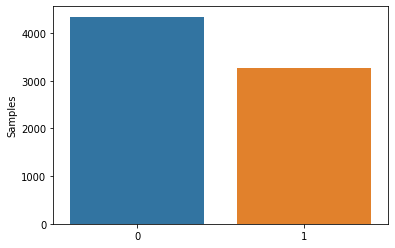

Samples per class (traninig): [4342 3271]


In [8]:
def plot_class_layout(df, col):
    """Plot the distribution of classes.  
       df: a pandas DataFrame,
       col: name of column indicating class labels."""
    x = df[col].value_counts()
    plt.figure()
    sns.barplot(x.index, x)
    plt.gca().set_ylabel('Samples')
    plt.show()
plot_class_layout(df_train, 'target')
print('Samples per class (traninig): {}'.format(np.bincount(df_train['target'])))

### Number of characters

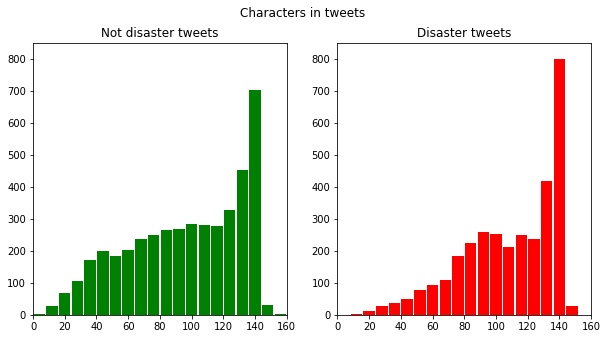

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

tweet_len = df_train[df_train['target']==0]['text'].str.len()
ax1.hist(tweet_len, bins=20, range=(0, 160), color='g', rwidth=0.9)
ax1.set_title('Not disaster tweets')
ax1.set_xlim(0, 160)
ax1.set_ylim(0, 850)

tweet_len = df_train[df_train['target']==1]['text'].str.len()
ax2.hist(tweet_len, bins=20, range=(0, 160), color='r', rwidth=0.9)
ax2.set_title('Disaster tweets')
ax2.set_xlim(0, 160)
ax2.set_ylim(0, 850)

fig.suptitle('Characters in tweets')
plt.show()

### Number of words

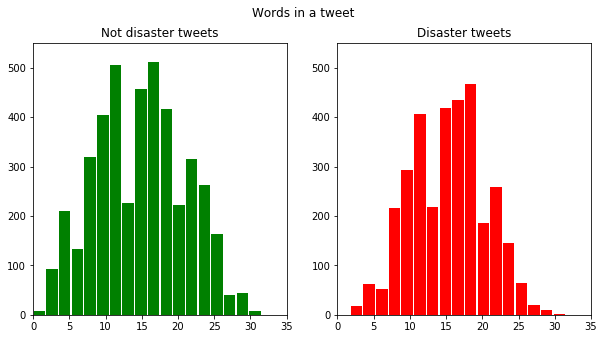

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

tweet_len = df_train[df_train['target']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, bins=20, range=(0, 35), color='g', rwidth=0.9)
ax1.set_title('Not disaster tweets')
ax1.set_xlim(0, 35)
ax1.set_ylim(0, 550)

tweet_len = df_train[df_train['target']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len, bins=20, range=(0, 35), color='r', rwidth=0.9)
ax2.set_title('Disaster tweets')
ax2.set_xlim(0, 35)
ax2.set_ylim(0, 550)

fig.suptitle('Words in a tweet')
plt.show()

### Average word length in a tweet

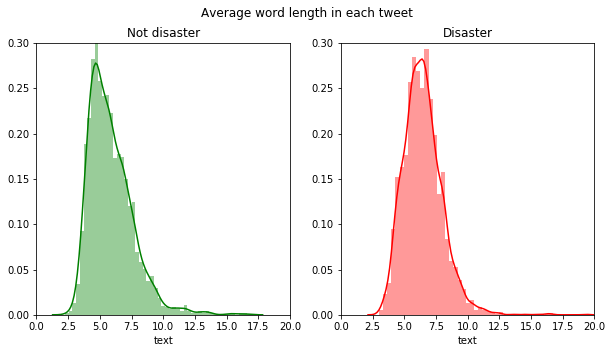

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

word = df_train[df_train['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1, color='g')
ax1.set_title('Not disaster')
ax1.set_xlim(0, 20)
ax1.set_ylim(0, .3)

word = df_train[df_train['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax2, color='r')
ax2.set_title('Disaster')
ax2.set_xlim(0, 20)
ax2.set_ylim(0, .3)

fig.suptitle('Average word length in each tweet')
plt.show()

### Word cloud

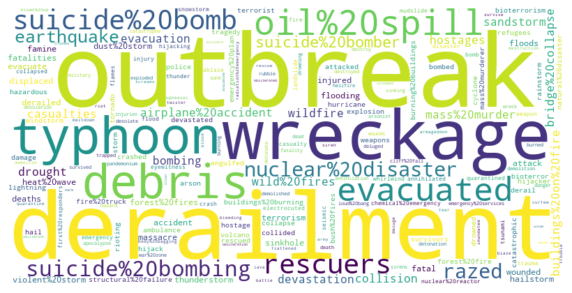

In [9]:
disaster_tweet = dict(df_train[df_train['target']==1]['keyword'].value_counts())

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").generate_from_frequencies(disaster_tweet)

plt.figure(figsize=[10, 6])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

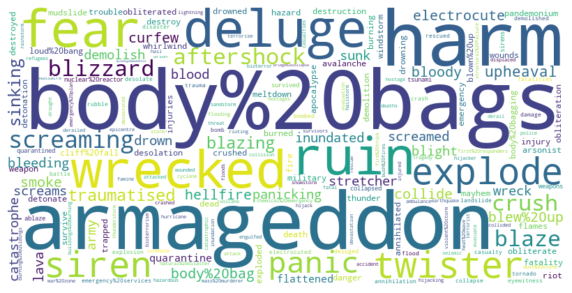

In [10]:
nondisaster_tweet = dict(df_train[df_train['target']==0]['keyword'].value_counts())

wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").generate_from_frequencies(nondisaster_tweet)

plt.figure(figsize=[10, 6])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

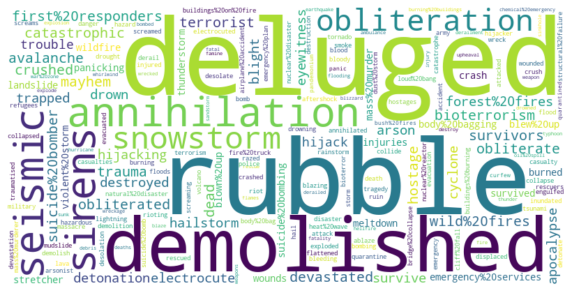

In [11]:
test_tweet = dict(df_test['keyword'].value_counts())

wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").generate_from_frequencies(test_tweet)

plt.figure(figsize=[10,6])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()